# WaterMark

## 读取数据

In [9]:
from data import load_random_images
from add_watermark import modify_red_to_green
from attack import attack_all
import matplotlib.pyplot as plt
from utils import draw, numpy_to_images, images_to_numpy
from examine import caculate
import numpy as np
from tqdm import tqdm

n = 10 # 处理图片的batch_size
image_type = "YCbCr"
images_orign = load_random_images("E:/code/watermark/code/ILSVRC/Data/DET/test", 2*n)

k_list  = list(range(1,101))
image_show_num = 5
d_ssim, d_psnr = {}, {}
auc_crop, auc_compress, auc_ori = {}, {}, {}
tpr_ori, tpr_crop, tpr_compress = {}, {}, {}
img_show = {}
for image_type in ["RGB", "YCbCr"]:
    images_ori = images_to_numpy(images_orign, type=image_type)
    auc_crop[image_type], auc_compress[image_type], auc_ori[image_type] = [], [], []
    tpr_ori[image_type], tpr_crop[image_type], tpr_compress[image_type] = [], [], []
    d_ssim[image_type], d_psnr[image_type] = [], []
    img_show[image_type] = {}
    for k in tqdm(k_list):
        # 红绿分区
        images_watermark = modify_red_to_green(images_ori[:n],k=k)
        img_show[image_type][0] = numpy_to_images(images_ori[:image_show_num], type=image_type)
        img_show[image_type][k] = numpy_to_images(images_watermark[:image_show_num], type=image_type)
        images = np.concatenate((images_watermark, images_ori[n:]), axis=0)
        # 攻击
        auc = attack_all(images,k=k, type=image_type)
        auc_ori[image_type].append(auc[0][0])
        auc_crop[image_type].append(auc[1][0])
        auc_compress[image_type].append(auc[2][0])
        
        tpr_ori[image_type].append(auc[0][1])
        tpr_crop[image_type].append(auc[1][1])
        tpr_compress[image_type].append(auc[2][1])
        
        scores = caculate(images_ori[:n], images_watermark)
        d_ssim[image_type].append(scores[0])
        d_psnr[image_type].append(scores[1])

100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


# 对比图片的精度损失

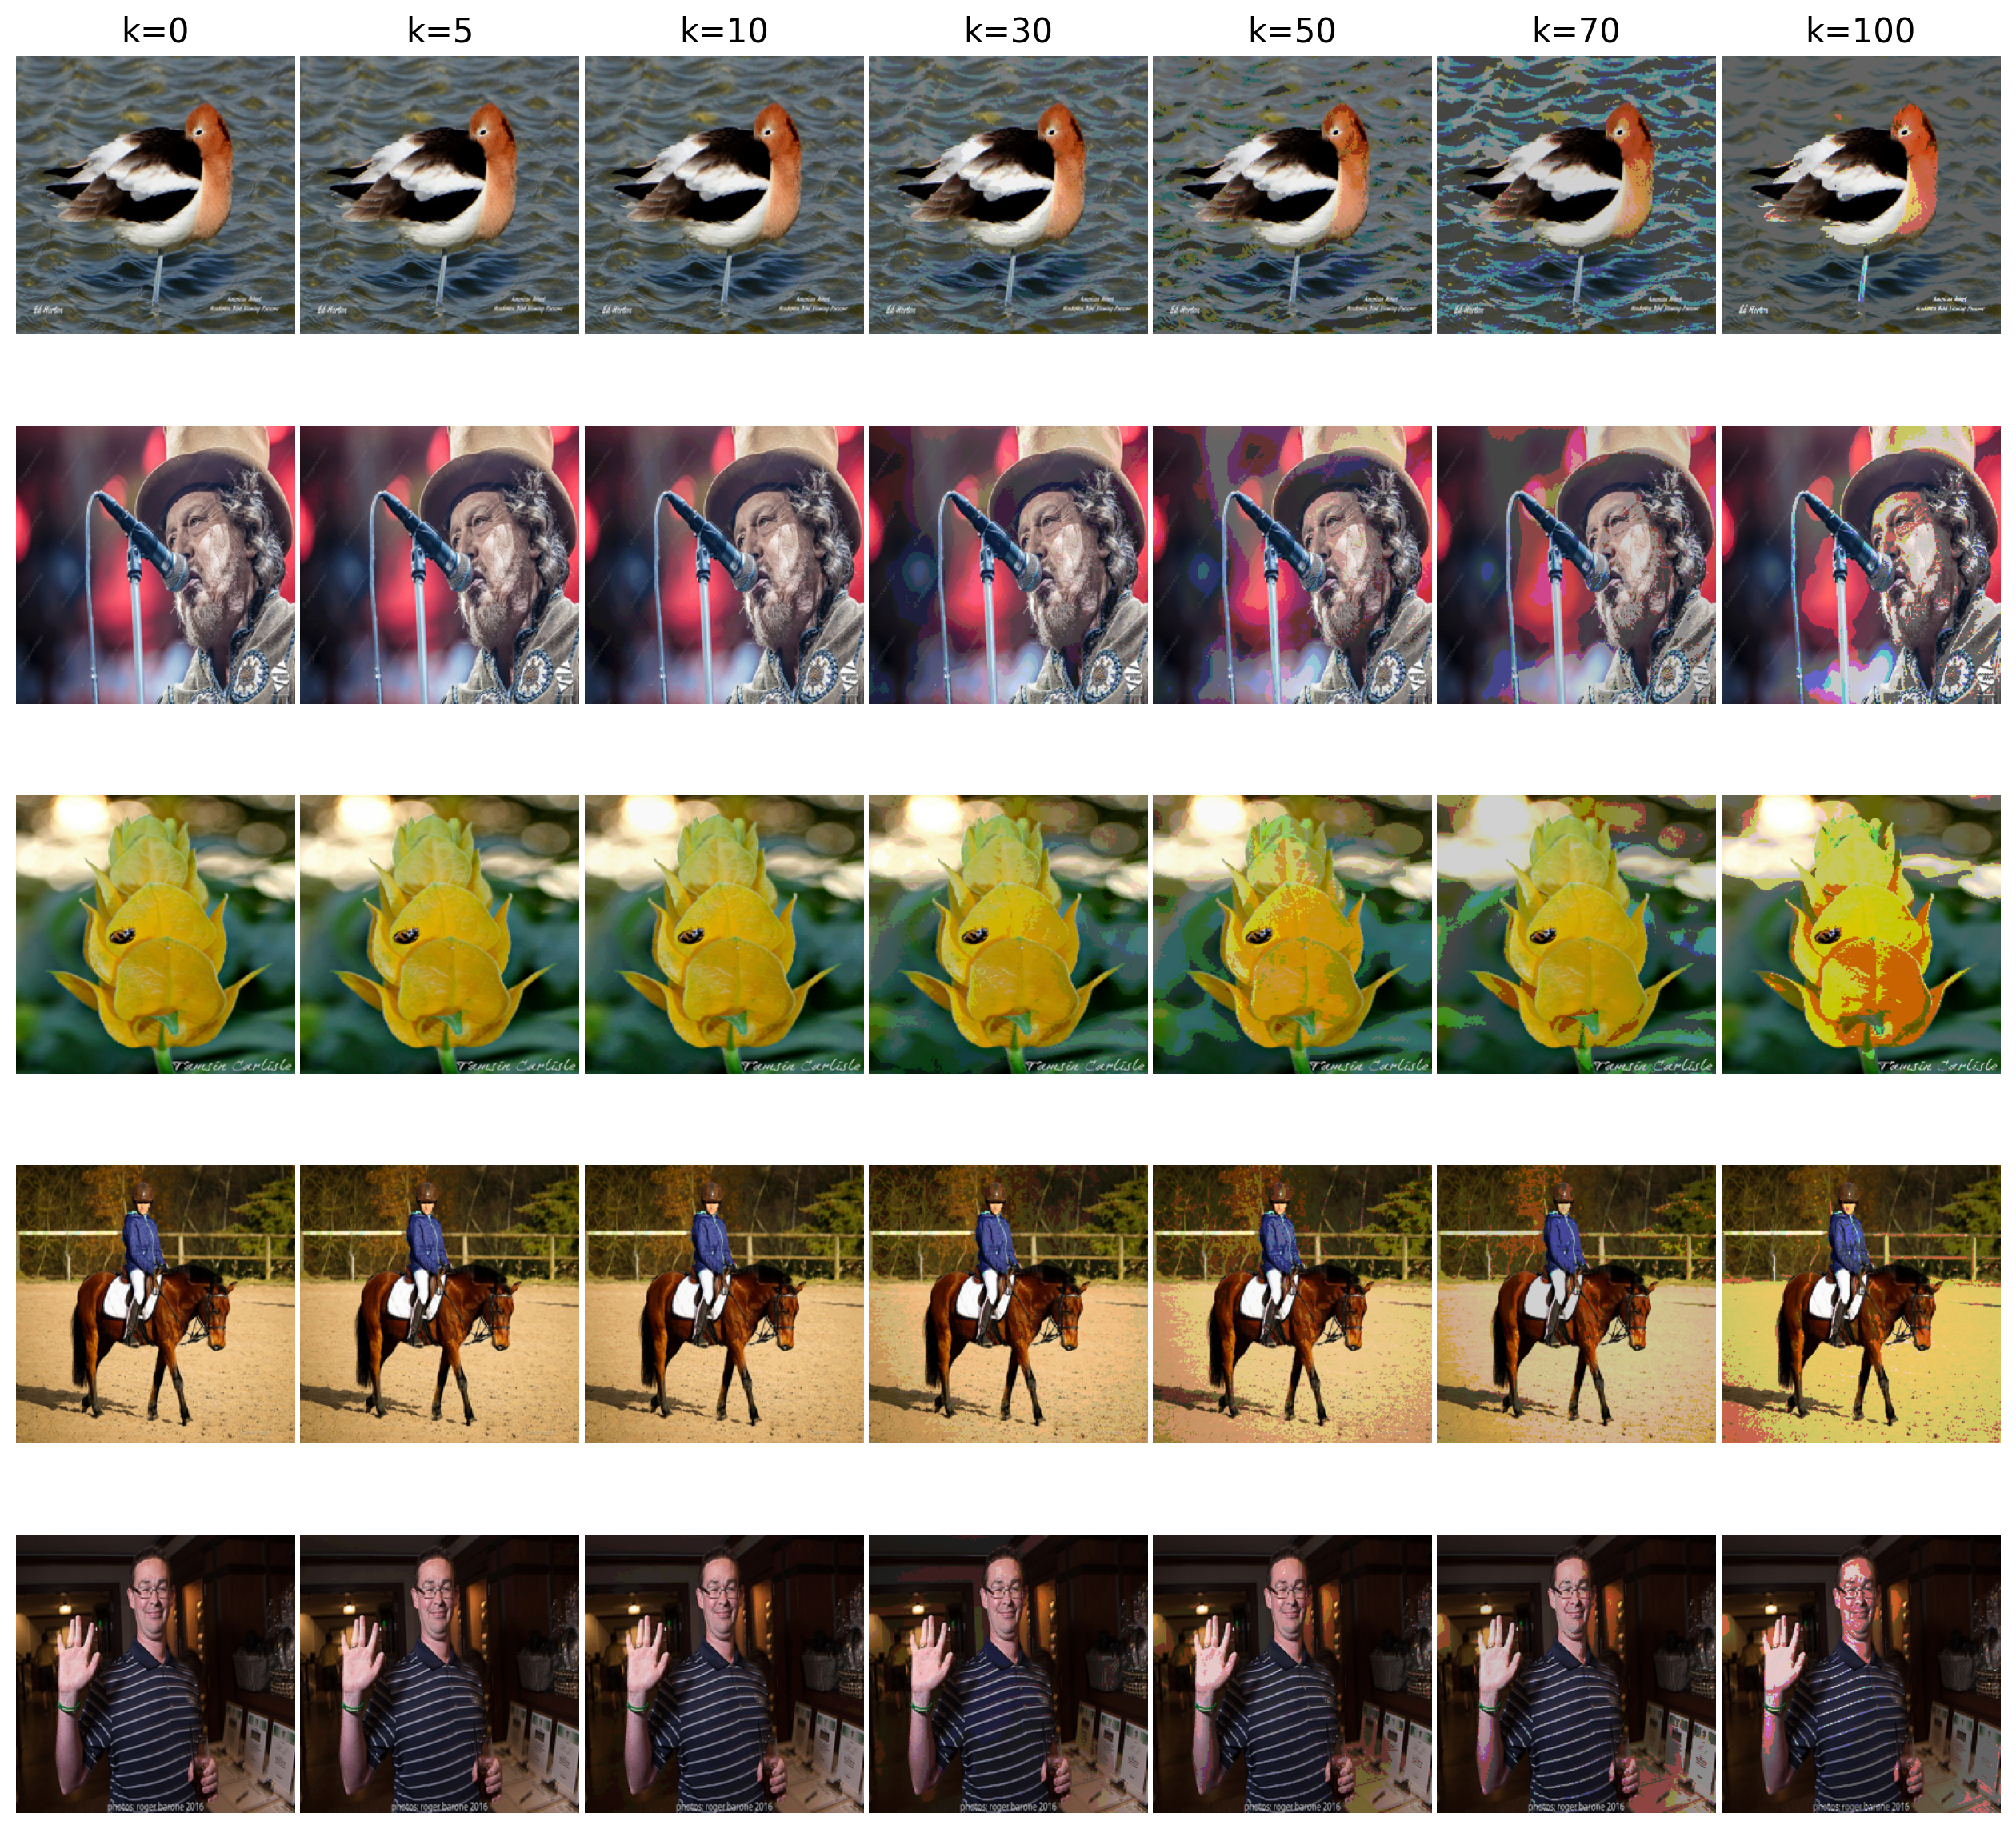

In [ ]:
k_lists = [0,5,10,30,50,70,100]
image_show_num =5
fig, axs = plt.subplots(image_show_num, len(k_lists),  figsize=(16, 15), dpi=200)
# print(img_show["YCbCr"])
# print(type(img_show["YCbCr"][1][0]))
for j in range(image_show_num):
    for i,k in enumerate(k_lists):
        axs[j][i].imshow(img_show["RGB"][k][j])
        if j == 0:
            axs[j][i].set_title(f"k={k}",fontsize=15)
        axs[j][i].axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.0001)
plt.show()

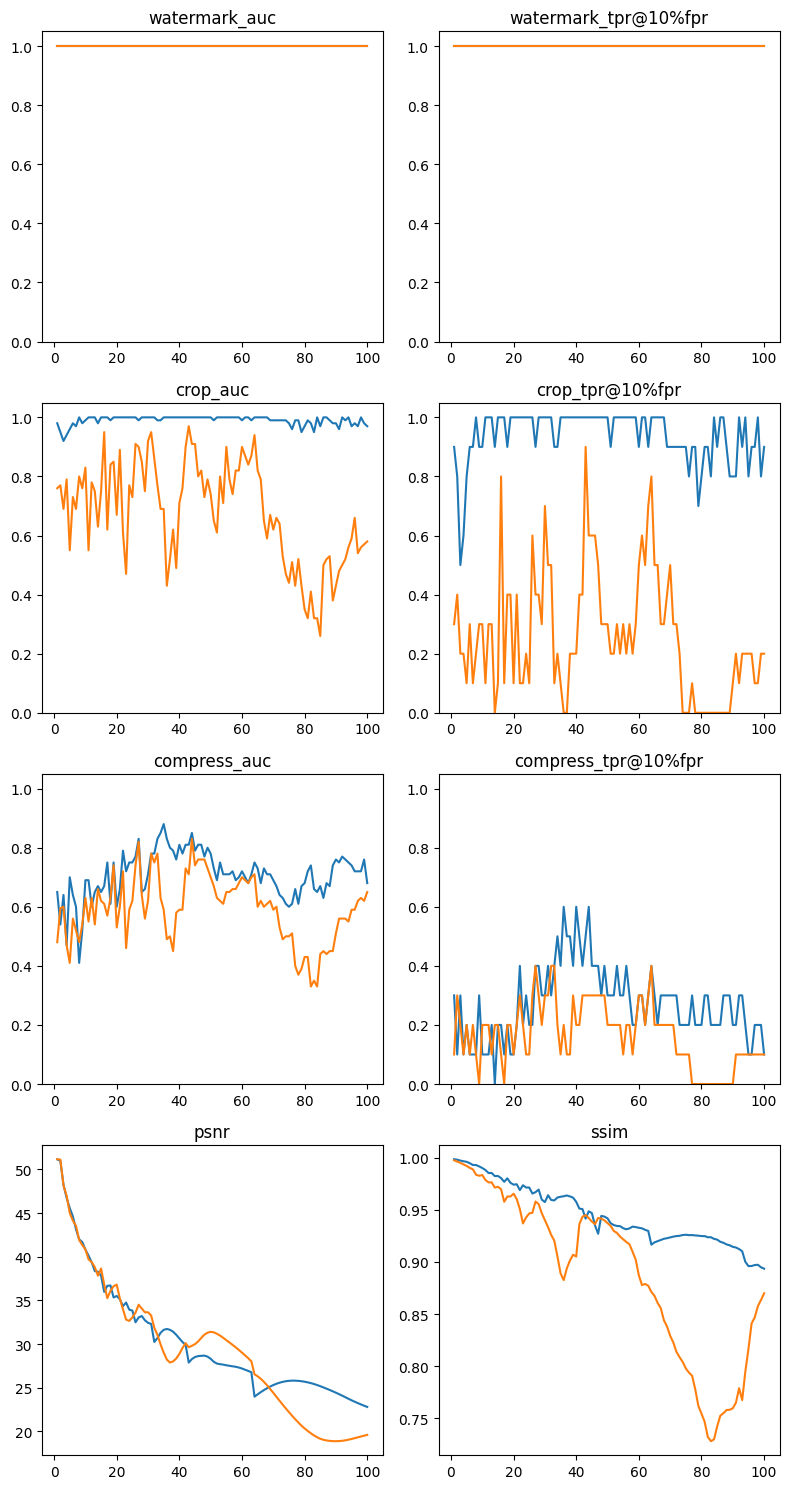

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(8, 15))
x = list(range(1,101))
global_min_1 = 0 # min(min(auc_ori), min(auc_crop), min(auc_compress)) * 0.9
global_max_1 = 1.05 #max(max(auc_ori), max(auc_crop), max(auc_compress)) * 1.1

global_min_2 = 0 # min(min(tpr_ori), min(tpr_crop), min(tpr_compress)) * 0.9
global_max_2 = 1.05 # max(max(tpr_ori), max(tpr_crop), max(tpr_compress)) * 1.1
# 绘制子图
axs[0][0].plot(x, auc_ori['RGB'])
axs[0][0].plot(x, auc_ori['YCbCr'])
axs[0][0].set_title("watermark_auc")
axs[0][1].plot(x, tpr_ori['RGB'])
axs[0][1].plot(x, tpr_ori['YCbCr'])
axs[0][1].set_title("watermark_tpr@10%fpr")
axs[0][0].set_ylim(global_min_1, global_max_1) 
axs[0][1].set_ylim(global_min_2, global_max_2) 

axs[1][0].plot(x, auc_crop['RGB'])
axs[1][0].plot(x, auc_crop['YCbCr'])   
axs[1][0].set_title("crop_auc")
axs[1][1].plot(x, tpr_crop['RGB'])
axs[1][1].plot(x, tpr_crop['YCbCr'])
axs[1][1].set_title("crop_tpr@10%fpr")
axs[1][0].set_ylim(global_min_1, global_max_1) 
axs[1][1].set_ylim(global_min_2, global_max_2) 


axs[2][0].plot(x, auc_compress['RGB'])
axs[2][0].plot(x, auc_compress['YCbCr'])
axs[2][0].set_title("compress_auc")
axs[2][1].plot(x, tpr_compress['RGB'])
axs[2][1].plot(x, tpr_compress['YCbCr'])
axs[2][1].set_title("compress_tpr@10%fpr")
axs[2][0].set_ylim(global_min_1, global_max_1) 
axs[2][1].set_ylim(global_min_2, global_max_2) 

axs[3][0].plot(x, d_psnr['RGB'])
axs[3][0].plot(x, d_psnr['YCbCr'])
axs[3][0].set_title("psnr")

axs[3][1].plot(x, d_ssim['RGB'])
axs[3][1].plot(x, d_ssim['YCbCr'])
axs[3][1].set_title("ssim")

# 设置整体布局
plt.tight_layout()
plt.show()
# print(auc_ori)
# print(auc_crop)
# print(auc_compress)
# print(d_psnr)
# print(d_ssim)

In [16]:
print(len(auc_ori['RGB']))

100
